In [79]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading the dataset

In [81]:
df = pd.read_csv("/content/drive/MyDrive/dilfinia/online_shoppers_intention.csv")

data preprocessing


In [82]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000



Data Cleaning
Missing Data Points

In [83]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [84]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           


Exploratory daa analysis

Correlation Analysis



<ipython-input-86-87aa1235496c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
<ipython-input-86-87aa1235496c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')


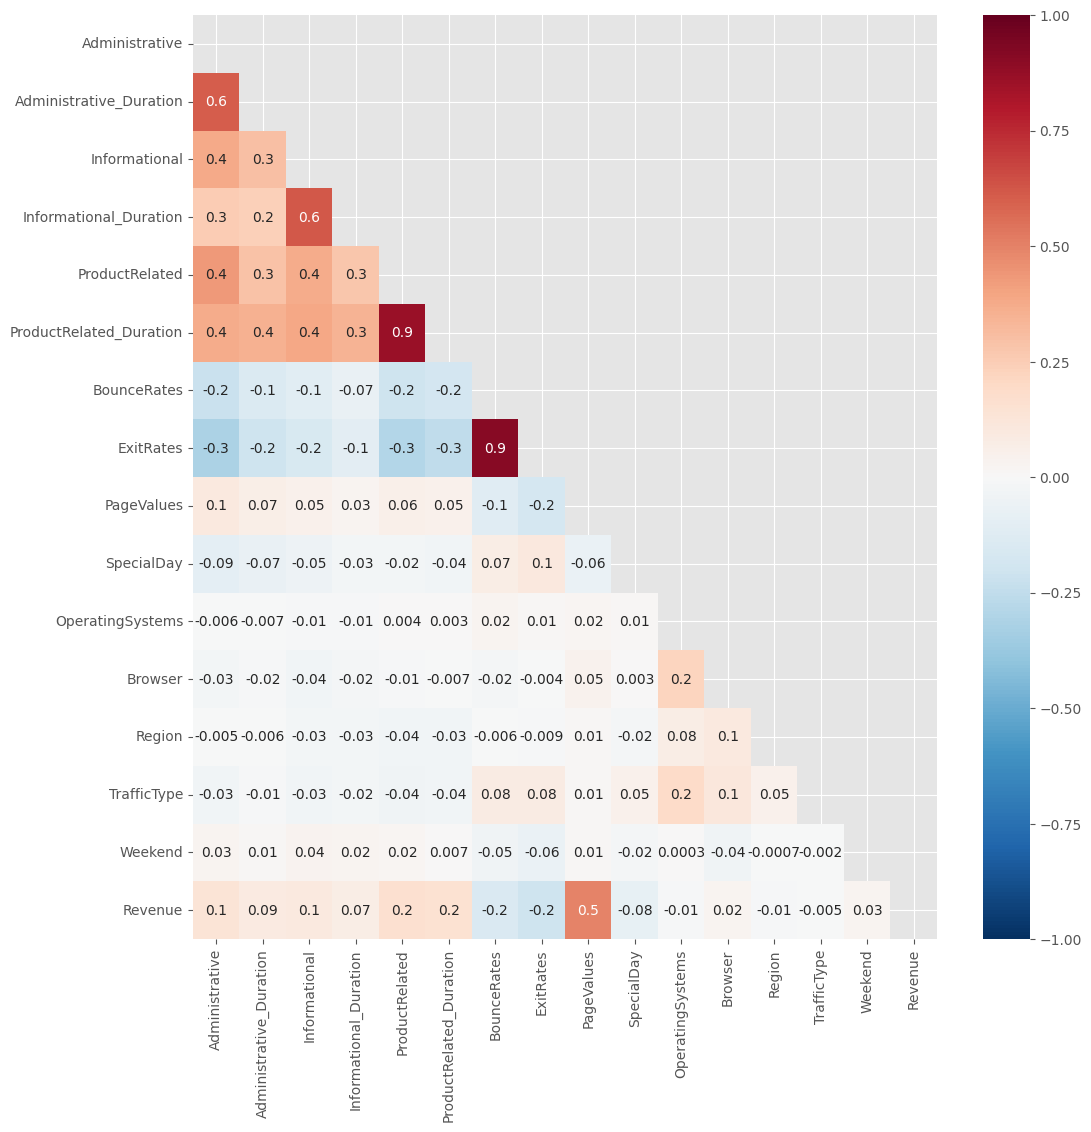

In [86]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()


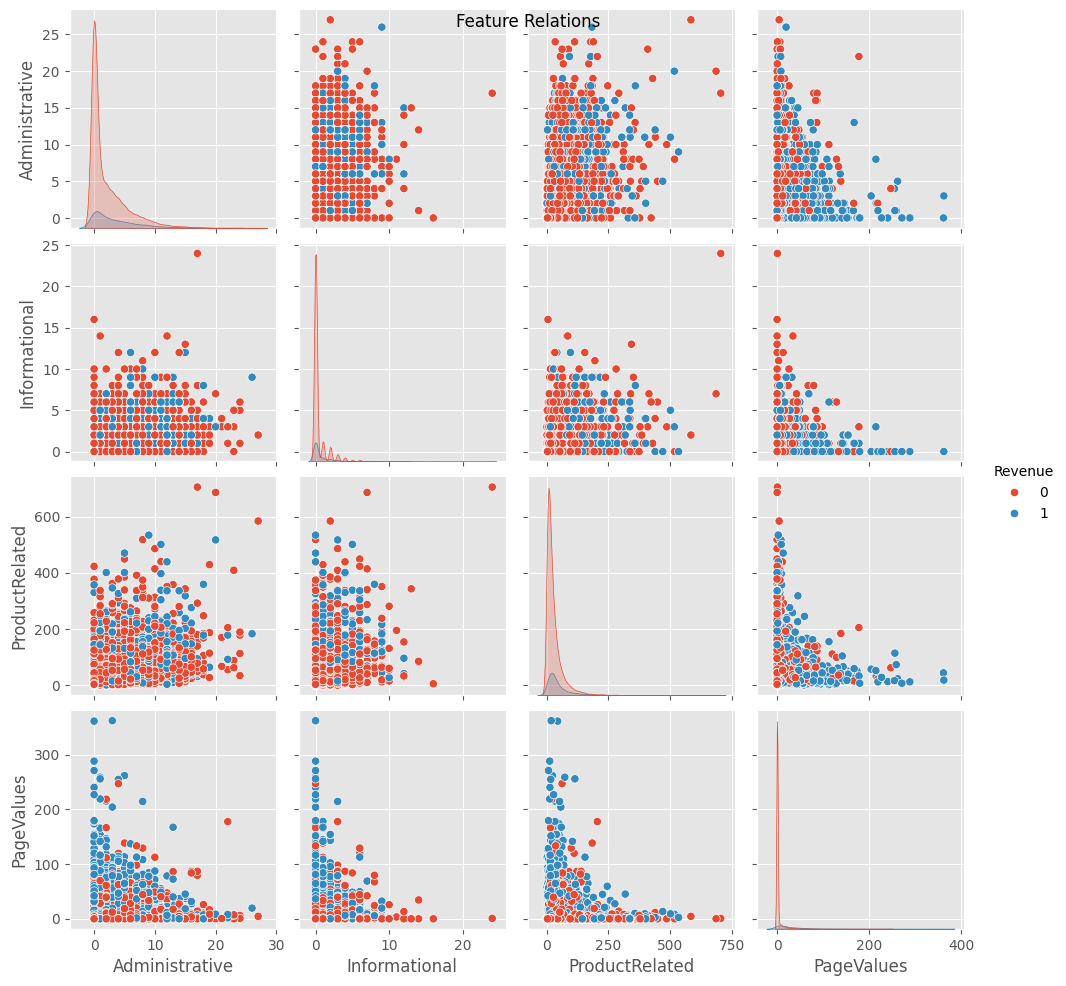

In [87]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

In [88]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [89]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


splitting the data into training and testing


In [90]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [91]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [92]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

navie bayes classifier

Gaussian Naive Bayes Performance:
---------------------------------
Accuracy        :  0.775013520822066
F1 Score        :  0.4914425427872861
Precision       :  0.3941176470588235
Recall          :  0.6525974025974026
Confusion Matrix:
  [[1232  309]
 [ 107  201]]
Confusion Matrix:
 [[1232  309]
 [ 107  201]]


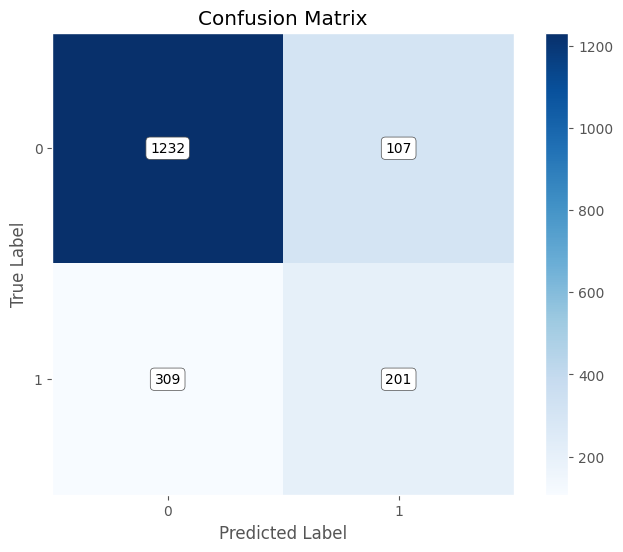

In [93]:
nbm = GaussianNB()
nbm.fit(X_train,y_train)
nbm_pred = nbm.predict(X_val)

print('Gaussian Naive Bayes Performance:')
print('---------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, nbm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, nbm_pred))
print('Precision       : ', metrics.precision_score(y_val, nbm_pred))
print('Recall          : ', metrics.recall_score(y_val, nbm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, nbm_pred))
cm = confusion_matrix(y_val, nbm_pred)
print('Confusion Matrix:\n', cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.yticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.text(0, 0, cm[0, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(0, 1, cm[0, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 0, cm[1, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 1, cm[1, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.grid(False)
plt.show()


In [60]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

roc curve plotting


model 1 AUC score: 0.7260391295920173


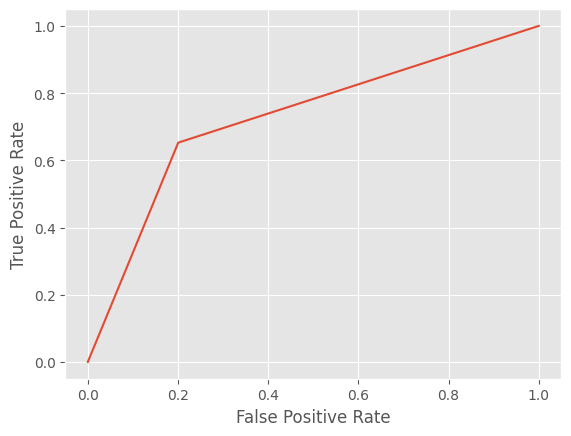

In [94]:
plot_roc_curve(y_val,nbm_pred)
print(f'model 1 AUC score: {roc_auc_score(y_val, nbm_pred)}')

K-Nearest Neighbor Initial Performance:
---------------------------------------
Accuracy        :  0.8734451054624122
F1 Score        :  0.5021276595744681
Precision       :  0.7283950617283951
Recall          :  0.38311688311688313
Confusion Matrix:
  [[1497   44]
 [ 190  118]]
Confusion Matrix:
 [[1497   44]
 [ 190  118]]


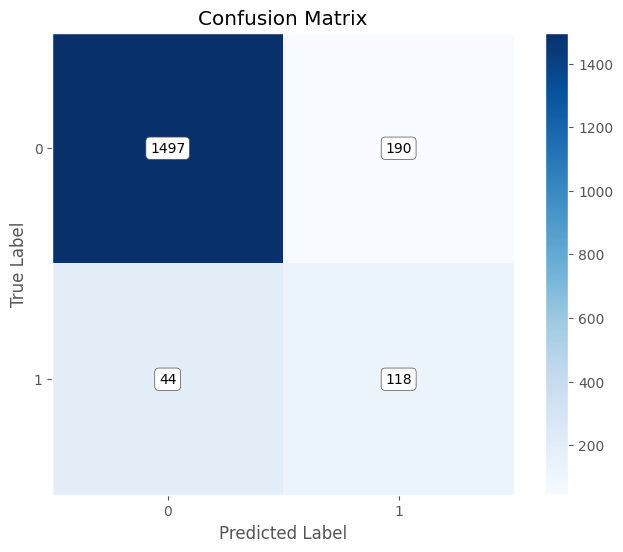

In [95]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',leaf_size=30,p=2) #default values
knn.fit(Xsc_train,y_train)
knn_pred = knn.predict(Xsc_val)

print('K-Nearest Neighbor Initial Performance:')
print('---------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, knn_pred))
print('F1 Score        : ', metrics.f1_score(y_val, knn_pred))
print('Precision       : ', metrics.precision_score(y_val, knn_pred))
print('Recall          : ', metrics.recall_score(y_val, knn_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, knn_pred))

cm = confusion_matrix(y_val, knn_pred)
print('Confusion Matrix:\n', cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.yticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.text(0, 0, cm[0, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(0, 1, cm[0, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 0, cm[1, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 1, cm[1, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.grid(False)
plt.show()



model 1 AUC score: 0.6772819976908231


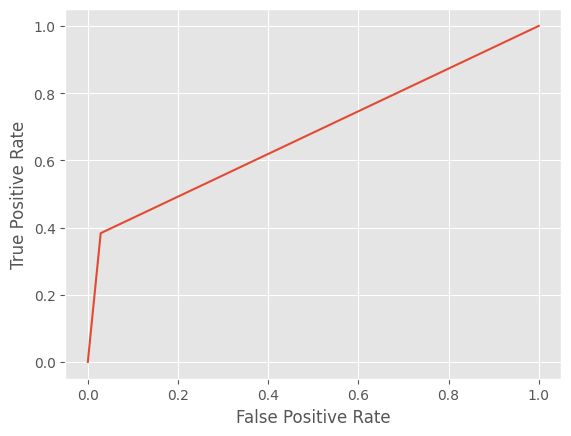

In [98]:
plot_roc_curve(y_val,knn_pred)
print(f'model 1 AUC score: {roc_auc_score(y_val, knn_pred)}')

SVM Initial Performance:
------------------------
Accuracy        :  0.8858842617631152
F1 Score        :  0.5788423153692615
Precision       :  0.7512953367875648
Recall          :  0.4707792207792208
Confusion Matrix:
  [[1493   48]
 [ 163  145]]
Confusion Matrix:
 [[1493   48]
 [ 163  145]]


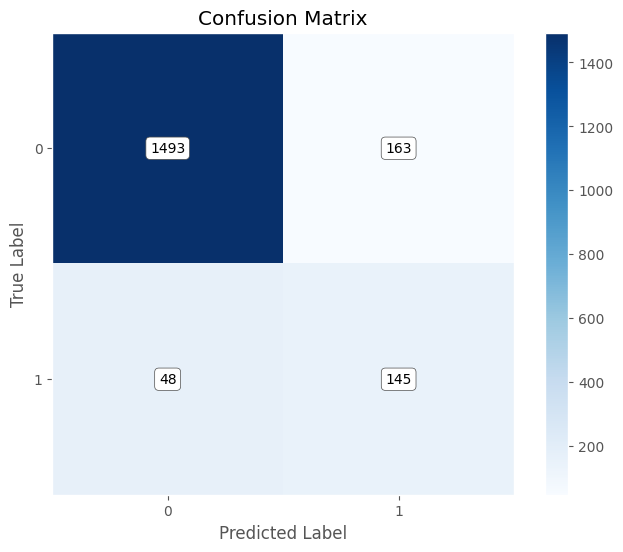

In [97]:
svm = SVC(C=1.0,kernel='rbf',degree=3,gamma=0.025) #default values
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

cm = confusion_matrix(y_val, svm_pred)
print('Confusion Matrix:\n', cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.yticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.text(0, 0, cm[0, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(0, 1, cm[0, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 0, cm[1, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 1, cm[1, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.grid(False)
plt.show()


model 1 AUC score: 0.7198153079885721


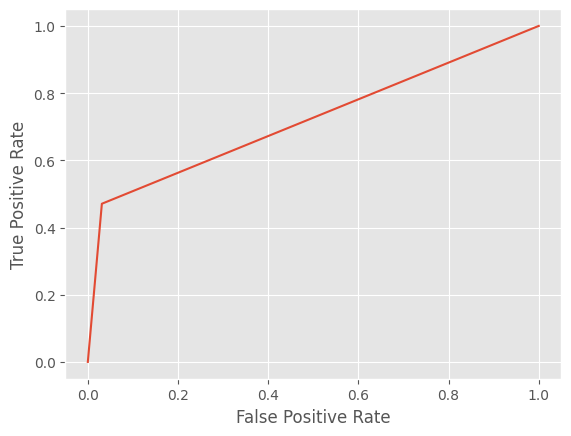

In [99]:
plot_roc_curve(y_val,svm_pred)
print(f'model 1 AUC score: {roc_auc_score(y_val, svm_pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8788534342888048
F1 Score        :  0.5313807531380752
Precision       :  0.7470588235294118
Recall          :  0.41233766233766234
Confusion Matrix:
  [[1498   43]
 [ 181  127]]
Confusion Matrix:
 [[1498   43]
 [ 181  127]]


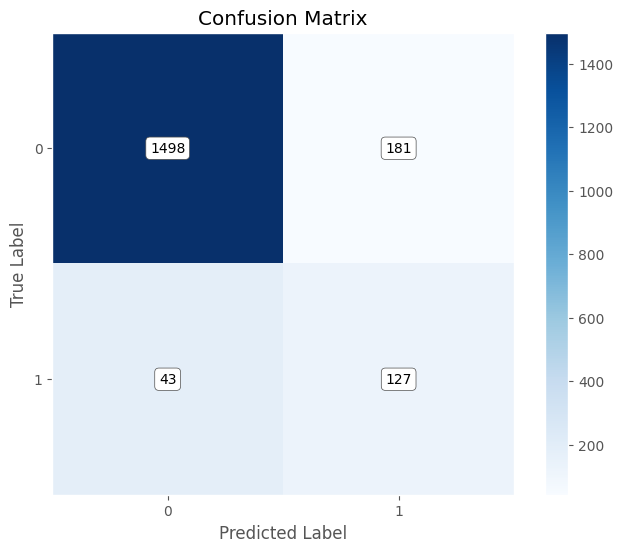

In [108]:
lrm = LogisticRegression(C=1.0,solver='lbfgs',) #default parameters
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))


cm = confusion_matrix(y_val, lrm_pred)
print('Confusion Matrix:\n', cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.yticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.text(0, 0, cm[0, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(0, 1, cm[0, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 0, cm[1, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 1, cm[1, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.grid(False)
plt.show()


model 1 AUC score: 0.6922168519345678


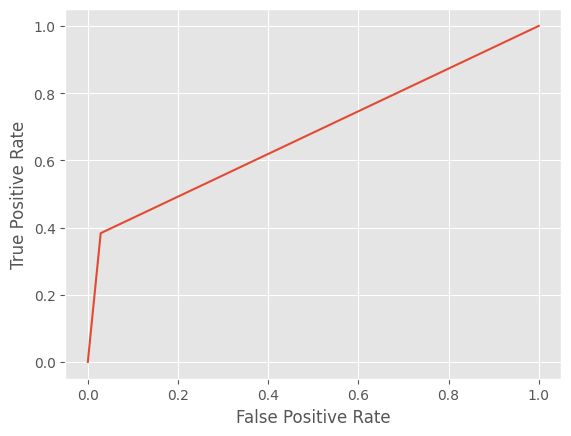

In [102]:
plot_roc_curve(y_val,knn_pred)
print(f'model 1 AUC score: {roc_auc_score(y_val, lrm_pred)}')

Perceptron Initial Performance:
--------------------------------
Accuracy        :  0.8274743104380746
F1 Score        :  0.4528301886792452
Precision       :  0.48
Recall          :  0.42857142857142855
Confusion Matrix:
 [[1398  143]
 [ 176  132]]
Confusion Matrix:
 [[1398  143]
 [ 176  132]]


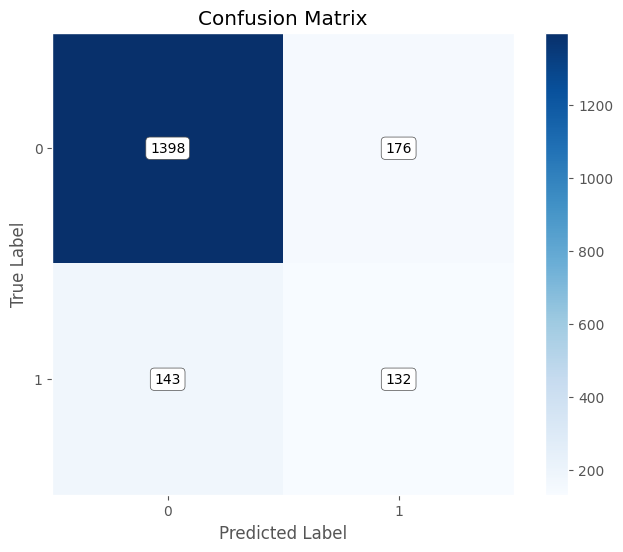

In [103]:
from sklearn.linear_model import Perceptron

# Create and train the Perceptron model
perceptron_model = Perceptron()
perceptron_model.fit(Xsc_train, y_train)
perceptron_pred = perceptron_model.predict(Xsc_val)

print('Perceptron Initial Performance:')
print('--------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, perceptron_pred))
print('F1 Score        : ', metrics.f1_score(y_val, perceptron_pred))
print('Precision       : ', metrics.precision_score(y_val, perceptron_pred))
print('Recall          : ', metrics.recall_score(y_val, perceptron_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, perceptron_pred))

cm = confusion_matrix(y_val, perceptron_pred)
print('Confusion Matrix:\n', cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.yticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.text(0, 0, cm[0, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(0, 1, cm[0, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 0, cm[1, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 1, cm[1, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.grid(False)
plt.show()


model 1 AUC score: 0.6678872717159544


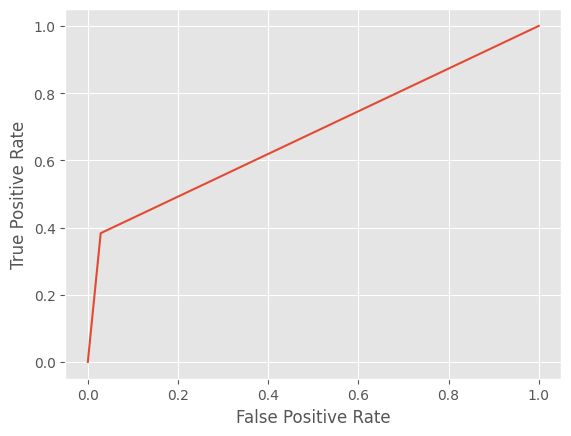

In [104]:
plot_roc_curve(y_val,knn_pred)
print(f'model 1 AUC score: {roc_auc_score(y_val, perceptron_pred)}')

Multi-Layer Perceptron Initial Performance:
-------------------------------------------
Accuracy        :  0.871281773931855
F1 Score        :  0.5641025641025642
Precision       :  0.6470588235294118
Recall          :  0.5
Confusion Matrix:
 [[1457   84]
 [ 154  154]]
Confusion Matrix:
 [[1457   84]
 [ 154  154]]


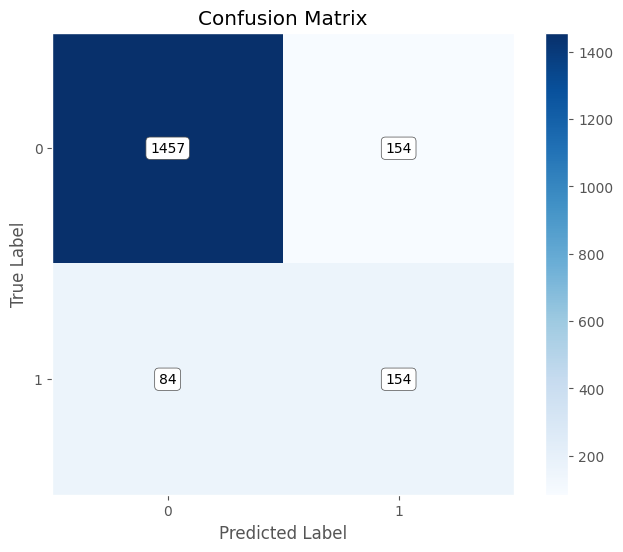

In [105]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)
mlp_model.fit(Xsc_train, y_train)
mlp_pred = mlp_model.predict(Xsc_val)

print('Multi-Layer Perceptron Initial Performance:')
print('-------------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, mlp_pred))
print('F1 Score        : ', metrics.f1_score(y_val, mlp_pred))
print('Precision       : ', metrics.precision_score(y_val, mlp_pred))
print('Recall          : ', metrics.recall_score(y_val, mlp_pred))
print('Confusion Matrix:\n', confusion_matrix(y_val, mlp_pred))

cm = confusion_matrix(y_val, mlp_pred)
print('Confusion Matrix:\n', cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.yticks(np.arange(len(np.unique(y_val))), np.unique(y_val))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.text(0, 0, cm[0, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(0, 1, cm[0, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 0, cm[1, 0], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.text(1, 1, cm[1, 1], va='center', ha='center', bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.grid(False)
plt.show()


model 1 AUC score: 0.722744970798183


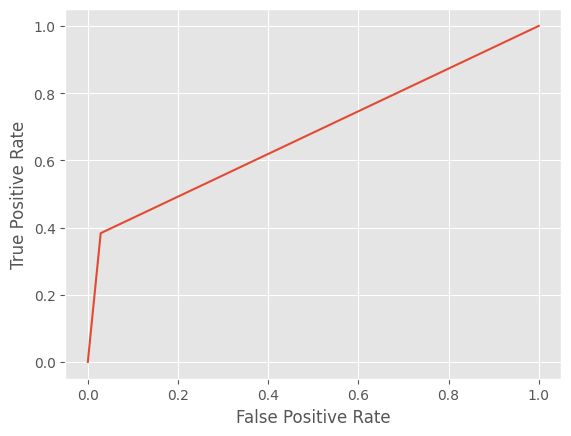

In [106]:
plot_roc_curve(y_val,knn_pred)
print(f'model 1 AUC score: {roc_auc_score(y_val, mlp_pred)}')

infrence from th results


Here's why the SVM is a strong contender based on these metrics:

*High Accuracy (0.8859): This indicates the SVM correctly classified a
significant proportion of the data points, suggesting it effectively captured the underlying patterns in your data

*Balanced F1-score (0.5788): This metric considers both precision and recall, and its value suggests a reasonable trade-off between identifying true positives and avoiding false positives/negatives.

*Good Precision (0.7513): This indicates a high level of confidence in the model's positive predictions, meaning most data points classified as positive were actually positive.


